
# Project-1: Investigate "No-show appointments" Dataset
---
<div style="text-align: justify"> Submitted as part of **AIRBUS Data Analyst Nanodegree** CORE CURRICULUM. </div>
<div style="text-align: right"> by: **_Pankaj NATH_** on February 29, 2020 (Iss.1.0).</div>

---
## Table of Revisons
Issue | Date | Reason for Revision
--- | --- | ---
1.0  | 29/02/2020 | First version.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The seleccted dataset for this investigation project work is named as "**No-show appointments**". Original source of this dataset is Kaggle and it can be downloaded by clicking [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv).
&nbsp;
This dataset contains more than **110k** datapoints related to medical appointments in Brazil for patients. It is focussed on whether a paitent shows-up for his/her medical appointment as scheduled. It also captures many other parameters as listed below:
&nbsp;
> 1. **PatientId**: Unique number to identify each paitent.
> 2. **AppointmentID**: Unique number to identify each appointment booked.
> 3. **Gender**: Gender of the paitent for whom appoint ment is made.
> 4. **ScheduledDay**: The day _(timestamp)_ when the appointment was made.
> 5. **AppointmentDay**: The day for which the appointment was taken.
> 6. **Age**: The age of the paitent for whom appointment was taken.
> 7. **Neighbourhood**: The location where the hospital is located.
> 8. **Scholarship**: This  indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família (https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
> 9. **Hipertension**: If the paitent has medical condition of Hypertension.
> 10. **Diabetes**: If the paitent has medical condition of Diatebets.
> 11. **Alcoholism**: If the paitent has medical condition of Alcohol abuse.
> 12. **Handcap**: If the paitent has medical condition impacting his/her mobility.
> 13. **SMS_received**: If the paitent recieved SMS reminder for thier scheduled appointment.
> 14. **No-show**: Finally if the paitent show-up or not as per their scheduled appointments.

### Questions for investigation
1. Is their any correlation observed between different parameters?
2. What is the overall success of Show against No-Show?  
3. Is Age, Handicap, SMS reminders, Scholarship or Advance Appointment booking a factor contributing to Show / No-Show?

In [1]:
# Importing pandas library which provides high-performance, easy-to-use data structures and analysis tools
import pandas as pd

# Importing Matplotlib library for ploting 2D plots/graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Importing seaborn library for plotting different charts/plots
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling & Data Cleaning

We will import the dataset and then investigate one-by-one all parameters present into the dataset and will clean it simultaneously as much as possible with justifications.

### General Properties

In [2]:
# Read dataset csv file
df_dataset = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Lets print and see first few datapoints from the top of this dataset
df_dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Lets print some statistics about all parameters
df_dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# Lets print the datatype info for all paramenters
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### PaitentId
This is an unique number to identify each paitent. It must be an integer. But from above we see it is **float64**.
Lets print out those unique float values persent in this column.

In [5]:
# Checking each value if it is an integer, if yes then add them in a list
patient_id_float = df_dataset[~ df_dataset.PatientId.apply(lambda x: x.is_integer())]
print('There are {} patients_ids that are floats'.format(len(patient_id_float)))
patient_id_float

There are 5 patients_ids that are floats


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


Considering the huge amount of datapoints, dropping above 5 datapoints would have negligible impact.

In [6]:
# Dropping the above identified datapoints
df_dataset.drop([3950 , 73228 , 73303, 100517, 105430], inplace=True)
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110522 non-null float64
AppointmentID     110522 non-null int64
Gender            110522 non-null object
ScheduledDay      110522 non-null object
AppointmentDay    110522 non-null object
Age               110522 non-null int64
Neighbourhood     110522 non-null object
Scholarship       110522 non-null int64
Hipertension      110522 non-null int64
Diabetes          110522 non-null int64
Alcoholism        110522 non-null int64
Handcap           110522 non-null int64
SMS_received      110522 non-null int64
No-show           110522 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


### AppointmentID
Ideally all Appointment IDs shall be unique. For 110522 entries we shall have 110522 unique appointment IDs. If not then an error is expected.

In [7]:
# Lets count the unique appointment ids in our dataset
unique_app_id = df_dataset['AppointmentID'].nunique()
print('There are {} unique appointment ids against 110522 entries.'.format(unique_app_id))

There are 110522 unique appointment ids against 110522 entries.


As expected all appointment ids are unique in our dataset.

### Gender
We expect that other than **F** and **M**, nothing else shall be present into Gender column.  
Below you can see that above statement is TRUE.

In [8]:
# Lets list unique values from Gender column
print('Unique values in Gender column are:', format(df_dataset.Gender.unique()))

Unique values in Gender column are: ['F' 'M']


### ScheduledDay and AppointmentDay
  
These two parameters in the dataset are timestamps. The time part is not so relevant.  
Lets extracts the date from these two parameters and assign them to two new columns. Using the information from date we can calculate how many days in advance appointments were booked. Lets create a third new columns for this calculationa as well.

In [9]:
# Extracting dates from ScheduledDay & AppointmentDay in two new columns ScheduledDate & AppointmentDate by splitting
# Extracting time from ScheduledDay & AppointmentDay in two new columns ScheduledTime & AppointmentTime by splitting
df_dataset[['ScheduledDate','ScheduledTime']] = df_dataset.ScheduledDay.str.split("T",expand=True)
df_dataset[['AppointmentDate','AppointmentTime']] = df_dataset.AppointmentDay.str.split("T",expand=True)

# Changing data type for these two new date columns to DateTime Format
df_dataset['ScheduledDate'] = pd.to_datetime(df_dataset['ScheduledDate'])
df_dataset['AppointmentDate'] = pd.to_datetime(df_dataset['AppointmentDate'])

# Dropping Time columns which are not needed anymore
df_dataset.drop(['ScheduledTime', 'AppointmentTime'], axis=1, inplace = True)

# Adding another new column to find how many days in advance an appointment was made?
df_dataset['DaysToAppointment'] = df_dataset.apply(lambda row: row.AppointmentDate - row.ScheduledDate, axis=1)
df_dataset['DaysAdvance'] = df_dataset.DaysToAppointment.astype('timedelta64[D]')
df_dataset.drop(['DaysToAppointment'], axis=1, inplace = True)

#Lets checkout some facts about of this new column 'DaysAdvance'
df_dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAdvance
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.475029e+14,5.675304e+06,37.089267,0.098270,0.197255,0.071859,0.030401,0.022249,0.321031,10.184045
std,2.560988e+14,7.129627e+04,23.110487,0.297681,0.397928,0.258255,0.171689,0.161546,0.466875,15.255246
min,5.628261e+06,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.173345e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174215e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439381e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


The minimum value in **DaysAdvance** is -6 days.  
This means that in our dataset, their are some datapoints which says apponitment were made for days which already passed. This is not possible since one can make appointment for same day (DaysAdvance = 0) or in advance (DaysAdvance > 0).  
So lets drop all those datapoints where DaysAdvance < 0.

In [10]:
# Removing all datapoints where DaysAdvance < 0
df_dataset.drop(df_dataset.index[df_dataset['AppointmentDate'] < df_dataset['ScheduledDate']], inplace = True)

# Lets drop the two day and two date columns as well
df_dataset.drop(['AppointmentDate', 'ScheduledDate', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace = True)
df_dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAdvance
count,1.105170e+05,1.105170e+05,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000
mean,1.475002e+14,5.675304e+06,37.089434,0.098274,0.197264,0.071862,0.030403,0.022232,0.321046,10.184596
std,2.560905e+14,7.129773e+04,23.110346,0.297687,0.397935,0.258261,0.171693,0.161496,0.466880,15.255365
min,5.628261e+06,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173166e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174490e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439381e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


### Age  
It is known fact that age can never be negative for alive paitients.  
But as we can see in cell above that minimum age in our dataset is -1.  
So lets clean the dataset and remove all datapoints with Age < 0.

In [11]:
# Lets see what are the unique ages in our dataset
print('Unique values in Age column are:', format(df_dataset.Age.unique()))

Unique values in Age column are: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [12]:
# As expected, we have all ages as integer values and one age as -1.
# Let's count number of rows with Age < 0.

NegativeAge = df_dataset.apply(lambda x: True if x['Age'] < 0 else False , axis=1)
 
# Count number of True cases in new series created above
numOfRows = len(NegativeAge[NegativeAge == True].index)
 
print('Number of Rows in dataframe in which Age < 0 : ', numOfRows)

Number of Rows in dataframe in which Age < 0 :  1


In [13]:
# There is only one row, so lets drop this row from our dataset
df_dataset.drop(df_dataset.index[df_dataset['Age'] < 0], inplace = True)
df_dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysAdvance
count,1.105160e+05,1.105160e+05,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000
mean,1.474973e+14,5.675303e+06,37.089779,0.098275,0.197266,0.071863,0.030403,0.022232,0.321049,10.184688
std,2.560898e+14,7.129743e+04,23.110167,0.297688,0.397936,0.258262,0.171694,0.161497,0.466882,15.255403
min,5.628261e+06,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173120e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174353e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439381e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


### Handcap  (Renaming to *_Handicap_*)
Let's rename this column to *'Handicap'*. It is of type Integer and has min_value = 0 and max_value = 4.
Let's also list the unique values in this column.

In [14]:
# Renaming the column header from Handcap to Handicap
df_dataset.rename(columns={'Handcap': 'Handicap'}, inplace=True)

# Listing the unique values in Handicap column
print('Unique values in Handicap column are:', format(df_dataset.Handicap.unique()))

Unique values in Handicap column are: [0 1 2 3 4]


We could interpret that [0 1 2 3 4] corresponds to different levels of disability with 0 being abled person to 4 being most impacted person.  
Data in this column looks good and hence no more actions.  
  
### Other Columns
Remaining other columns (listed below) are all of integer type and with min_value = 0 and max_value = 1.  
> * Scholarship
> * Hipertension
> * Diabetes
> * Alcoholism
> * SMS_received

Let's list the unique values in these remaining columns and if we expect to find only '0' and '1'.  
If we see anything else then further investigation is needed.

In [15]:
# Listing the unique values in Scholarship column
print('Unique values in Scholarship column are:', format(df_dataset.Scholarship.unique()))

# Listing the unique values in Hipertension column
print('Unique values in Hipertension column are:', format(df_dataset.Hipertension.unique()))

# Listing the unique values in Diabetes column
print('Unique values in Diabetes column are:', format(df_dataset.Diabetes.unique()))

# Listing the unique values in Alcoholism column
print('Unique values in Alcoholism column are:', format(df_dataset.Alcoholism.unique()))

# Listing the unique values in SMS_received column
print('Unique values in SMS_received column are:', format(df_dataset.SMS_received.unique()))

Unique values in Scholarship column are: [0 1]
Unique values in Hipertension column are: [1 0]
Unique values in Diabetes column are: [0 1]
Unique values in Alcoholism column are: [0 1]
Unique values in SMS_received column are: [0 1]


Data in remaining columns seems consistence with our expectation.  
  
### Neighbourhood  
  
Let see hospitals from how many unique areas are involved.

In [16]:
# Lets count the unique Neighbourhoods from our dataset
unique_Neighbourhoods = df_dataset['Neighbourhood'].nunique()
print('There are {} unique Neighbourhoods in our dataset.'.format(unique_Neighbourhoods))

# Listing the unique Neighbourhoods
Neighbourhoods = df_dataset.Neighbourhood.unique()
print('Unique Neighbourhoods are: ')
Neighbourhoods.sort()
print (Neighbourhoods)

There are 81 unique Neighbourhoods in our dataset.
Unique Neighbourhoods are: 
['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA 

All 81 Neighbourhoods are unique and no more alignment is this parameter needed.  
  
### No-show  
This column represnts the status if Paitent shows up as scheduled appointment or not. Lets see what values are present into this column.

In [17]:
# Their is a need to rename the column because in next line of code we recieve and error due to hypen symbol.
df_dataset.rename(columns={'No-show': 'NoShow'}, inplace=True)

# Listing the unique values in NoShow column
print('Unique values in NoShow column are:', format(df_dataset.NoShow.unique()))

Unique values in NoShow column are: ['No' 'Yes']


When NoShow = No, it means the appointment was a success as planned.  
When NoShow = Yes, it means the paitent didnot show-up as scheduled.

To be inline with other columns, where binary values '0' & '1' are used, the values in NoShow column will be updated as:
> NoShow = 0, it means the appointment was a success as planned.  
> NoShow = 1, it means the paitent didnot show-up as scheduled.

In [18]:
# updateing the values in NoShow column, No by 0 and Yeas by 1.
df_dataset['NoShow'] = df_dataset['NoShow'].map({'No': 0, 'Yes': 1})

# Listing the unique values in NoShow column
print('Unique values in NoShow column are:', format(df_dataset.NoShow.unique()))

Unique values in NoShow column are: [0 1]


<a id='eda'></a>
## Exploratory Data Analysis
  
### Research Question 1 : Is their any correlation observed between different parameters?

Using the cleaned dataset, now lets plot a correlation matrix to  if we can find any strong correlation between all available parameters.

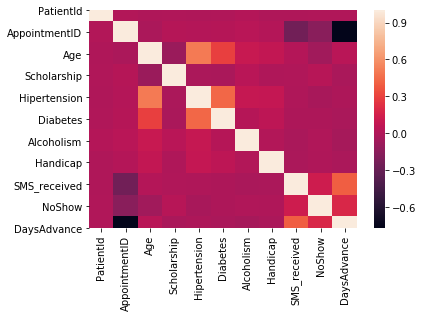

In [19]:
# Plotting correlation matrix on whole of dataset
corr = df_dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

A strong positive correlation is visible between Age, Hipertension and Diabetes. When one increases the other increases as well.

### Research Question 2 : What is the overall success of Show against No-Show?

79.8% of appointments were sucessful.


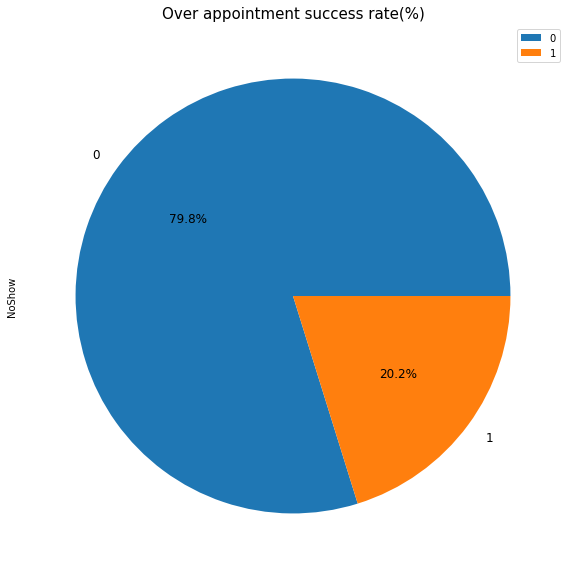

In [20]:
# Total appointment details Show / No-Show in our dataset
Show_status = df_dataset['NoShow'].value_counts()

# Total No-shows in our dataset
NoShow_count = Show_status[1]

# Total shows in our dataset
Show_count = Show_status[0]

# Success percentage of show
rate = round((Show_count/(Show_count+NoShow_count))*100,1)

print('{}% of appointments were sucessful.'.format(rate))
pieChart = Show_status.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Over appointment success rate" + '(%)', fontsize = 15);
plt.legend();

### Research Question 3: Is Age, Handicap, SMS reminders, Scholarship or Advance Appointment booking a factor contributing to Show / No-Show?  
  
Lets find out how age is distributed.

In [21]:
df_grouped_age = df_dataset.groupby('NoShow').agg({'Age': ['mean', 'min', 'max']})
print(df_grouped_age)
print('\n')
df_grouped_handicap = df_dataset.groupby('NoShow').agg({'Handicap': ['mean', 'min', 'max']})
print(df_grouped_handicap)
print('\n')
df_grouped_sms = df_dataset.groupby('NoShow').agg({'SMS_received': ['mean', 'min', 'max']})
print(df_grouped_sms)
print('\n')
df_grouped_scholarship = df_dataset.groupby('NoShow').agg({'Scholarship': ['mean', 'min', 'max']})
print(df_grouped_scholarship)
print('\n')
df_grouped_advance = df_dataset.groupby('NoShow').agg({'DaysAdvance': ['mean', 'min', 'max']})
print(df_grouped_advance)

              Age         
             mean min  max
NoShow                    
0       37.791036   0  115
1       34.317872   0  115


        Handicap        
            mean min max
NoShow                  
0       0.022743   0   4
1       0.020212   0   4


       SMS_received        
               mean min max
NoShow                     
0          0.291343   0   1
1          0.438469   0   1


       Scholarship        
              mean min max
NoShow                    
0         0.093909   0   1
1         0.115533   0   1


       DaysAdvance            
              mean  min    max
NoShow                        
0         8.755108  0.0  179.0
1        15.835484  0.0  179.0


<a id='conclusions'></a>
## Conclusions

1. Higher positive correlation is observed between Age, Hipertension and Diabetes. With this dataset, it can be said that with higher age the probability of having Hipertension and Diabetes in paitent is higher.  
2. The success percentage of appointment is nearly 79.8% where the paitent shows up as scheduled.  
3. Age, Handicap and Scholarship have negligible to no impact on sucess of appoitment being successful.  
4. In an average if and appointment is made less than 9 days in advance then it has higher probability of a show.  
5. An intereseting fact noticed is that SMS reminders are less effective because most of paitents who recieve SMS reminders end up as No-shows. And most of the paitents who Show up as schedule didnot recieved SMS reminders.